In [1]:
import Duns_and_Ros as dr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"""
l = float(input('Введите глубину скважины, м '))
d = float(input('Введите диаметр скважины, м '))
eps = float(input('Введите значение шероховатости, м '))
mu_o = float(input('Введите значение вязкости нефти, Па*с'))
mu_g = float(input('Введите значение вязкости газа, Па*с '))
sigm = float(input('Введите значение поверхнастного натяжения, кг/с2 '))
q_l = float(input('Введите дебит жидкости, м3/с '))
q_g = float(input('Введите дебит газа, м3/с '))
ro_l = float(input('Введите плотность жидкости, кг/м3 '))
ro_g = float(input('Введите плотность газа, кг/м3 '))

"""

mu_o = float(0.97/1000)
mu_g = float(0.016/1000)
sigm = float(8.41/1000)
d = float(0.1524)
q_l = float(0.022)
q_g = float(1.0214)
ro_l = float(762.64)
ro_g = float(0.9419)
eps = float(18.288*10**(-6))
l = 3000

surch = int(input("Введите 0 если надо найти Устьевое давление,1 если Забойное "))
if surch == 0:
    p_wf = float(input("Введите Забойное давление "))
    p_wh = 0
else:
    p_wh = float(input("Введите Устьевое давление "))
    p_wf = 0

Введите 0 если надо найти Устьевое давление,1 если Забойное 1
Введите Устьевое давление 2


In [3]:
flow, v_sl, v_sg, N_lv, N_gv, N_d, N_l = dr.define_fp(d, q_l, q_g, ro_l, sigm, mu_o)

In [4]:
def calc_abc(l, p_wf, p_wh):
    """Функция считающая давление на качждом участке скважины"""
    if p_wf == 0:
        return dr.calc_grad(N_gv, N_d, N_lv, N_l, ro_l, ro_g, v_sg, v_sl, sigm, q_l, q_g, mu_o, mu_g, d, eps, surch, p_wf, p_wh, l, flow)*l*10**-6+p_wh
    else:
        return p_wf-dr.calc_grad(N_gv, N_d, N_lv, N_l, ro_l, ro_g, v_sg, v_sl, sigm, q_l, q_g, mu_o, mu_g, d, eps, surch, p_wf, p_wh, l, flow)*l*10**-6

In [5]:
#Создание списка давлений по глубине скважины
spisok=[calc_abc(i, p_wf, p_wh) for i in range(l+1)]
if spisok[0]>spisok[7]:
    spisok.reverse()

In [6]:
if flow == 0:
    print('Тип потока: Пузырьковый')
elif flow == 1:
    print('Тип потока: Пробковый')
elif flow == 2:
    print('Тип потока: Эмульсионный')
elif flow == 3:
    print('Тип потока: Переходный')

print('Градиент давления равения dp_dl = ', dr.calc_grad(N_gv, N_d, N_lv, N_l, ro_l, ro_g, v_sg, v_sl, sigm, q_l, q_g, mu_o, mu_g, d, eps, surch, p_wf, p_wh, l, flow)*10**-6, ', МПа')
if surch == 0:
    print('Устьевое давление p_wh = ', dr.calc_pressure(N_gv, N_d, N_lv, N_l, ro_l, ro_g, v_sg, v_sl, sigm, q_l, q_g, mu_o, mu_g, d, eps, surch, p_wf, p_wh, flow, l), ', МПа')
else:
    print('Забойное давление p_wf = ', dr.calc_pressure(N_gv, N_d, N_lv, N_l, ro_l, ro_g, v_sg, v_sl, sigm, q_l, q_g, mu_o, mu_g, d, eps, surch, p_wf, p_wh, flow, l), ', МПа')

Тип потока: Переходный
Градиент давления равения dp_dl =  0.0007814927064605715 , МПа
Забойное давление p_wf =  4.344478119381714 , МПа


Text(0, 0.5, 'P, МПа')

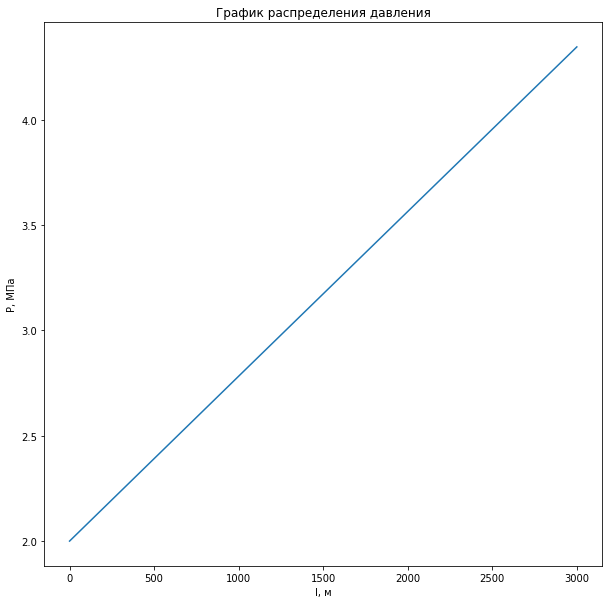

In [7]:
plt.figure(figsize=(10, 10))
c=[]
for i in range(l+1):
    c.append(i)
plt.plot(c, spisok)
plt.title("График распределения давления")
plt.xlabel("l, м")
plt.ylabel("P, МПа")

In [8]:
q_array1 = np.arange(0.01, 1000, 2)
q_array=[]
for i in q_array1: 
    q_array.append(i/86400)
    
p_wf_array= []
for q in q_array:
    flow, v_sl, v_sg, N_lv, N_gv, N_d, N_l = dr.define_fp(d, q_l, q, ro_l, sigm, mu_o)
    p_wf_array.append(dr.calc_pressure(N_gv, N_d, N_lv, N_l, ro_l, ro_g, v_sg, v_sl, sigm, q_l, q, mu_o, mu_g, d, eps, surch, p_wf, p_wh, flow, l))

Text(0, 0.5, 'P_wf, МПа')

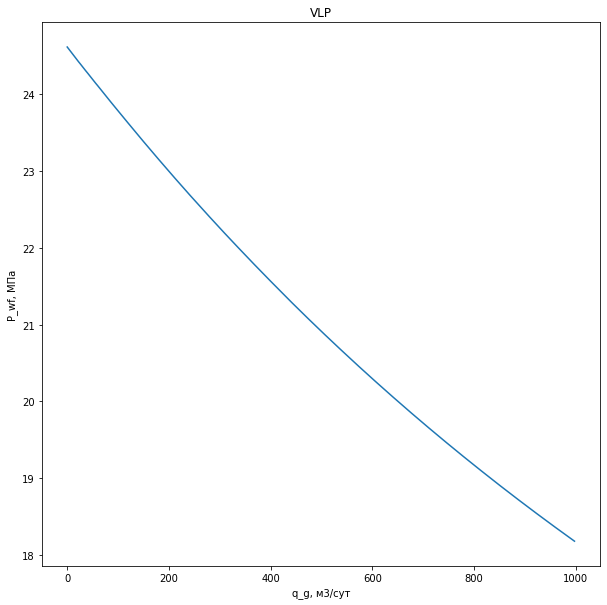

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(q_array1, p_wf_array)
plt.title("VLP")
plt.xlabel("q_g, м3/сут")
plt.ylabel("P_wf, МПа")

In [10]:
import pandas as pd

In [11]:
 def p_vogel_wct(q_liq: float, p_res: float, pb: float, k_prod: float,
                 wct: float) -> float:
        """
        ## Функция расчета забойного давления по Вогелю с учетом поправки на обводненность

        Parameters
        ----------
        :param q_liq: значение расхода, (м3/сут)
        :param p_res: пластовое давление, (бар)
        :param pb: давление насыщения, (бар)
        :param k_prod: коэффициент продуктивности, (м3/сут/бар)
        :param wct: обводненность, (%)

        :return: p_wf: забойное давление, (бар)
        -------
        """

        # 'проверка  данных
        try:
            if q_liq <= 0 or pb <= 0 or p_res <= 0:
                raise ValueError
        except TypeError:
            raise ValueError
        pb = min(pb, p_res)
        # ' вычисляем дебит при давлении равном давлению насыщения.
        qb = k_prod * (p_res - pb)
        wct = min(wct, 100)
        wct = max(wct, 0)

        if (wct == 100) or (q_liq < qb):
            return (p_res - q_liq / k_prod)
        else:
            fw = wct / 100
            fo = 1 - fw
            # ' максимальный дебит чистой нефти
            qo_max = qb + (k_prod * pb) / 1.8

            if q_liq < qo_max:

                return fw * (p_res - q_liq / k_prod) + fo * 0.125 * pb * (
                        -1 + (1 - 80 * ((q_liq - qo_max) / (qo_max - qb))) ** 0.5)

            else:
                cg = 0.001 * qo_max
                cd = fw * (cg / k_prod) + fo * 0.125 * pb * (
                        -1 + (1 + 80 * ((0.001 * qo_max) / (qo_max - qb))) ** 0.5)
                p_vogel_wct_res = fw * (p_res - qo_max / k_prod) - (q_liq - qo_max) * (cd / cg)
                if p_vogel_wct_res < 0:
                    return 0


In [12]:
p_res = 240
pb = 180
k_prod = 0.9869233
wct=1

In [13]:
q_array = np.arange(0.01, 200, 2)
p_wf_array= []
for q in q_array:
    p_wf_array.append(p_vogel_wct(q, p_res, pb, k_prod, wct))

Text(0, 0.5, 'P_wf, ,бар')

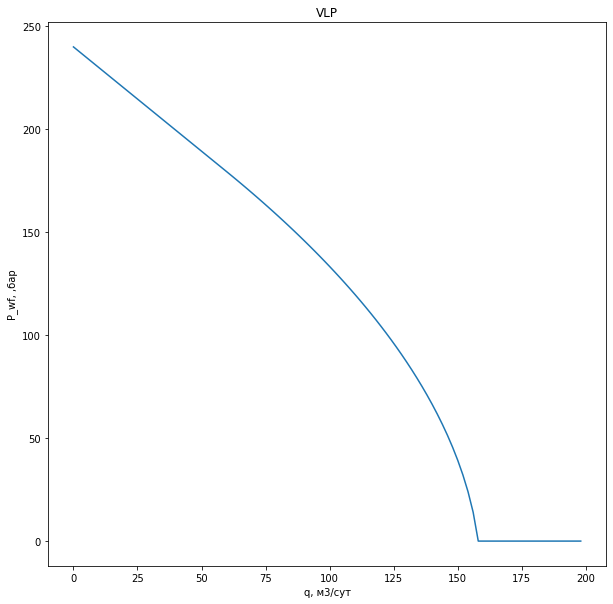

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(q_array, p_wf_array)
plt.title("VLP")
plt.xlabel("q, м3/сут")
plt.ylabel("P_wf, ,бар")

In [15]:
#Построение графика VLP
q_liq = 25.0   #По результатам ГДИС (Гидродинамические исследования скважин)
pb = 23        #Давление насыщения
p_wf = 18      #Забойное давление по результатам ГДИС
p_res = 35     #Пластовое давление

In [16]:
def calc_B (p_wf: float, p_res: float, pb: float):
    pr = min(pb, p_res)
    B = 1-0.2*(p_wf/pr)-0.8*(p_wf/pr)**2
    return B

In [17]:
qb = 1.8*q_liq*(p_res-pb)/(1.8*(p_res-pb)+pb*calc_B(p_wf, p_res, pb))
print("qb = ", qb)
PI = qb/(p_res-pb)
q_max = (q_liq-qb*(1-calc_B(p_wf, p_res, pb)))/calc_B(p_wf, p_res, pb)
print("q_max = ", q_max)

qb =  18.163205615677096
q_max =  37.503656039777724


In [18]:
def q_vogel(p_wf: float, q_liq: float, p_res: float, pb: float, PI: float) -> float:
        """
        Функция расчета дебита от забойного давления по Вогелю

        Parameters
        ----------
        :param q_liq: значение расхода, (м3/сут)
        :param p_res: пластовое давление, (МПа)
        :param pb: давление насыщения, (МПа)
        :param PI: коэффициент продуктивности, (м3/сут/МПа)

        :return: p_wf: забойное давление, (МПа)
        -------
        """

        # проверка  данных
        try:
            if q_liq <= 0 or pb <= 0 or p_res <= 0:
                raise ValueError
        except TypeError:
            raise ValueError
            
        if p_wf >= pb:
            q = PI*(p_res-p_wf)
            return q
        else:
            q = q_max*calc_B(p, p_res, pb)-qb*(calc_B(p, p_res, pb)-1)
            return q
        
        

In [19]:
p_array = np.arange(0, p_res, 1)
q_wf_array= []
for p in p_array:
    q_wf_array.append(q_vogel(p, q_liq, p_res, pb, PI))

Text(0, 0.5, 'P_wf, МПа')

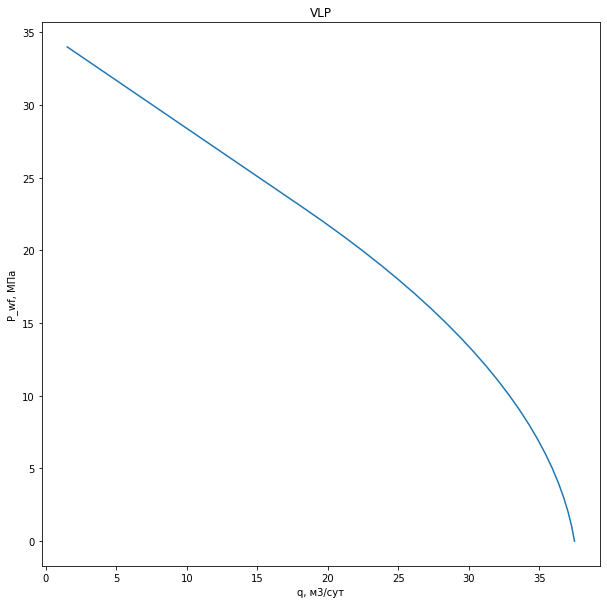

In [20]:
plt.figure(figsize=(10, 10))
plt.plot(q_wf_array, p_array)
plt.title("VLP")
plt.xlabel("q, м3/сут")
plt.ylabel("P_wf, МПа")